# Loan Data Exploration
## by Sameh Khalil Ahmed

## Preliminary Wrangling

We will explore a dataset of Loan Data from Prosper that contains attributes about more than 113K loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

We will have a high level view of the data shaoe and types

In [6]:
df.shape

(113937, 81)

In [5]:
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object

In [7]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [8]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

There are 81 attributes for each loan, we will choose only attributes of interest to out exploration.

In [10]:
columns = [
    'ListingKey',
    'Term',
    'LoanStatus',
    'LenderYield',
    'BorrowerRate',  
    'LoanOriginalAmount',
    'ListingCategory (numeric)',
    'IncomeRange',
    'StatedMonthlyIncome',
    'MonthlyLoanPayment',
    'PercentFunded',
    'Investors',
]
df = df[columns]

In [17]:
df.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [18]:
df.describe()

,Term,LenderYield,BorrowerRate,LoanOriginalAmount,ListingCategory,StatedMonthlyIncome,MonthlyLoanPayment,PercentFunded,Investors
count,113937.000000,113937.000000,113937.000000,113937.00000,113937.000000,1.139370e+05,113937.000000,113937.000000,113937.000000
mean,40.830248,0.182701,0.192764,8337.01385,2.774209,5.608026e+03,272.475783,0.998584,80.475228
std,10.436212,0.074516,0.074818,6245.80058,3.996797,7.478497e+03,192.697812,0.017919,103.239020
min,12.000000,-0.010000,0.000000,1000.00000,0.000000,0.000000e+00,0.000000,0.700000,1.000000
25%,36.000000,0.124200,0.134000,4000.00000,1.000000,3.200333e+03,131.620000,1.000000,2.000000
50%,36.000000,0.173000,0.184000,6500.00000,1.000000,4.666667e+03,217.740000,1.000000,44.000000
75%,36.000000,0.240000,0.250000,12000.00000,3.000000,6.825000e+03,371.580000,1.000000,115.000000
max,60.000000,0.492500,0.497500,35000.00000,20.000000,1.750003e+06,2251.510000,1.012500,1189.000000


In [13]:
df.isnull().sum()

ListingKey                   0
Term                         0
LoanStatus                   0
LenderYield                  0
BorrowerRate                 0
LoanOriginalAmount           0
ListingCategory (numeric)    0
IncomeRange                  0
StatedMonthlyIncome          0
MonthlyLoanPayment           0
PercentFunded                0
Investors                    0
dtype: int64

In [14]:
df.isna().sum()

ListingKey                   0
Term                         0
LoanStatus                   0
LenderYield                  0
BorrowerRate                 0
LoanOriginalAmount           0
ListingCategory (numeric)    0
IncomeRange                  0
StatedMonthlyIncome          0
MonthlyLoanPayment           0
PercentFunded                0
Investors                    0
dtype: int64

### What is the structure of your dataset?

There are 113937 loans in the dataset and 81 attributes for each loan, we reduced to 12 attributes to make our exploration more manageable.

4 attributes are categorical in nature

Term: 12, 36, 60 (in months)

Loan Status: ---------------------

ListingCategory: -----------------

IncomeRange: ---------------------

No Rows has any null or NaN values

### What is/are the main feature(s) of interest in your dataset?

I am most interested in finding what factors affect the LenderYield, if a lender want to maximize their return what attributes should they consider.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the Borrower Rate and Loan Amount to have most effect on the lender yield, also the Term, Category, Borrower Income as well as how many other investors are interested might have effect on the yield of the loan.

# Questions to try to answer

> Is there a relationship between the LenderYield and Term in months, in other words is it better to make multiple monthly loans or longer loans
> Relationship between ListingCategory and LoanStatus, which has higher completion rates

## Univariate Exploration

We will start by looking at main attribute: LenderYield

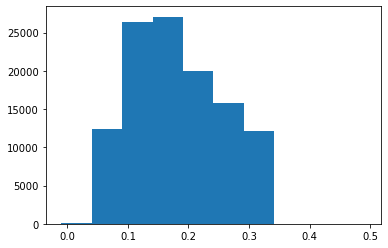

In [20]:
plt.hist(data = df, x = 'LenderYield');

In [23]:
df.LenderYield.describe()

count    113937.000000
mean          0.182701
std           0.074516
min          -0.010000
25%           0.124200
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

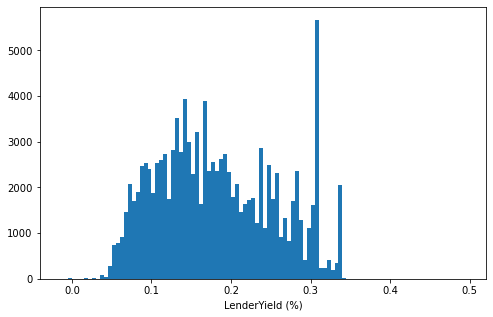

In [34]:
# improve the bin sizes
binsize = 0.005
bins = np.arange(df['LenderYield'].min()-binsize, df['LenderYield'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df[(df.LenderYield <= 0.35)], x = 'LenderYield', bins=bins);
plt.xlabel('LenderYield (%)')
plt.show();

The attribute is close to normal distribution with a spike around 0.3 and some outliers over 0.35

In [35]:
(df.LenderYield < 0).sum()

12

In [32]:
24 / df.shape[0]

0.00021064272361041628

as the outliers are small percentage of the data, we will remove them.

In [38]:
yield_outliers = (df['LenderYield'] < 0) | (df['LenderYield'] > .35)
df = df.loc[~yield_outliers]

In [39]:
df.shape

(113901, 12)

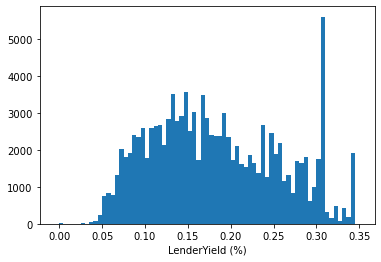

In [43]:
bins = np.arange(df['LenderYield'].min()-binsize, df['LenderYield'].max()+binsize, binsize)
plt.hist(data = df, x = 'LenderYield', bins=bins);
plt.xlabel('LenderYield (%)')
plt.show();

C:\Users\DS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


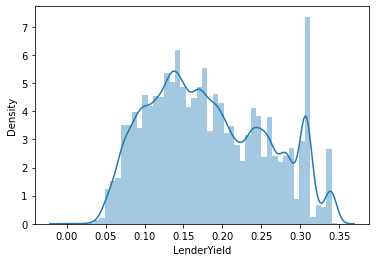

In [44]:
sb.distplot(df['LenderYield']);

Next we check the Loan Amount

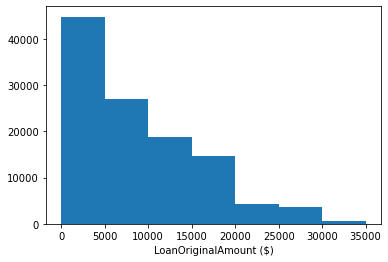

In [48]:
# start with a standard-scaled plot
binsize = 5000
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)

plt.hist(data = df, x = 'LoanOriginalAmount', bins=bins)
plt.xlabel('LoanOriginalAmount ($)')
plt.show();

a long tail in the distribution, so we put it on a log scale.

In [27]:
np.log10(df.LoanOriginalAmount.describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

In [65]:
df.LoanOriginalAmount.value_counts()

4000     14332
15000    12407
10000    11106
5000      6985
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2467, dtype: int64

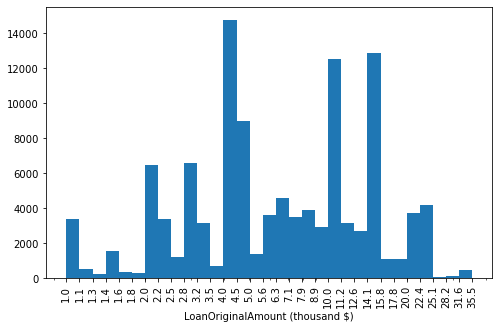

In [63]:
# update to a log scale
binsize = 0.05
bins = 10 ** np.arange(3, 4.54 + binsize, binsize)

# label for each thousand
labels = ['{:0.1f}'.format(v / 1000) for v in bins]

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins=bins)
plt.xlabel('LoanOriginalAmount (thousand $)')
plt.xscale('log');
plt.xticks(bins, labels);
plt.xticks(rotation=90);
plt.show();

Loan Amounts has a spikes around the 4-5K, 10K and 15K marks

Borrower Rate

In [75]:
df.BorrowerRate.value_counts()

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1319
          ... 
0.0908       1
0.3024       1
0.2739       1
0.2084       1
0.0739       1
Name: BorrowerRate, Length: 2285, dtype: int64

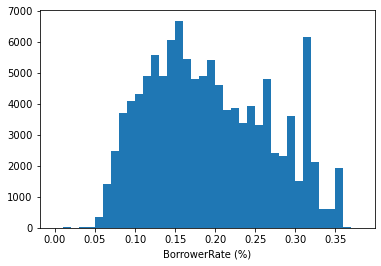

In [74]:
binsize = 0.01
bins = np.arange(df['BorrowerRate'].min()-binsize, df['BorrowerRate'].max()+binsize, binsize)

plt.hist(data = df, x = 'BorrowerRate', bins=bins)
plt.xlabel('BorrowerRate (%)')
plt.show();

Borrower rate has a narrow a right skewed distrubtion with a spike around 0.32

Next we check the loan status

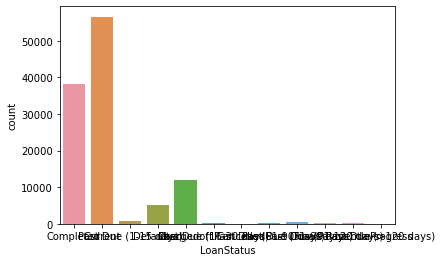

In [46]:
sb.countplot(data=df, x="LoanStatus");

Make it readable and easier to interpret

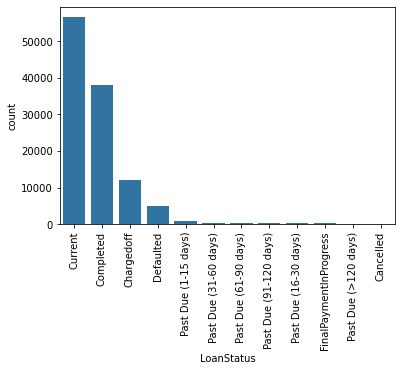

In [47]:
# simplify chart by removing different colors
base_color = sb.color_palette()[0]

freq = df['LoanStatus'].value_counts();
status_order = freq.index

sb.countplot(data=df, x="LoanStatus", color=base_color, order=status_order);
plt.xticks(rotation=90);

The vast majority are either current or completed.

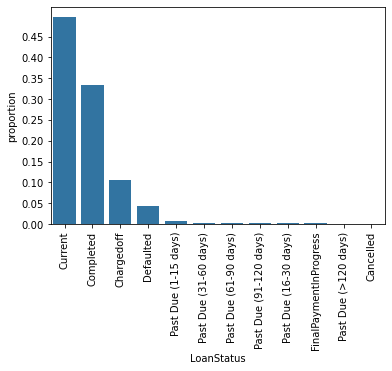

In [78]:
# create a freq chart
status_counts = df['LoanStatus'].value_counts()
status_order = status_counts.index
n_status = status_counts.sum()
max_status = status_counts[0]
max_prop = max_status / n_status
status_ticks = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in status_ticks]

sb.countplot(data=df, x='LoanStatus', color=base_color, order=status_order);
plt.yticks(status_ticks * n_status, tick_names)
plt.ylabel('proportion');
plt.xticks(rotation=90);

Lets Explore the Term

In [70]:
df.Term.value_counts();

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [ ]:
term_counts = df.Term.value_counts()
plt.pie(term_counts, labels = term_counts.index, startangle = 90, counterclock = False);
plt.axis('square');
plt.xlabel('Load Terms in Month');

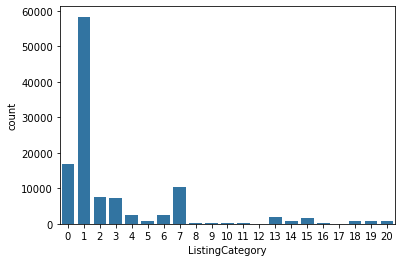

In [9]:
sb.countplot(data = df, x='ListingCategory', color=base_color);

The Vast majority are of type 1 (Debt Consolidation)

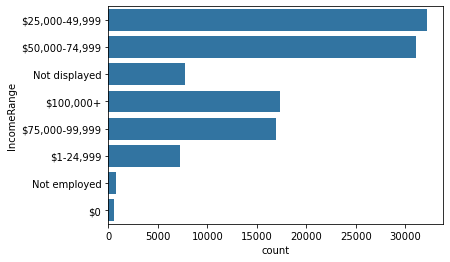

In [79]:
sb.countplot(data = df, y='IncomeRange', color=base_color);
# plt.xticks(rotation=90);

Investigate Stated Monthly Income

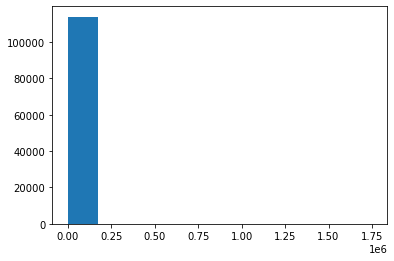

In [82]:
plt.hist(data=df, x = 'StatedMonthlyIncome');

In [83]:
df.StatedMonthlyIncome.describe()

count    1.139010e+05
mean     5.608701e+03
std      7.479456e+03
min      0.000000e+00
25%      3.205417e+03
50%      4.666667e+03
75%      6.832833e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [87]:
income_outliers = df.StatedMonthlyIncome > 1e5
print(income_outliers.sum())

9763


In [85]:
df = df.loc[~(df['StatedMonthlyIncome'] > 1e5)];

C:\Users\DS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='StatedMonthlyIncome', ylabel='Density'>

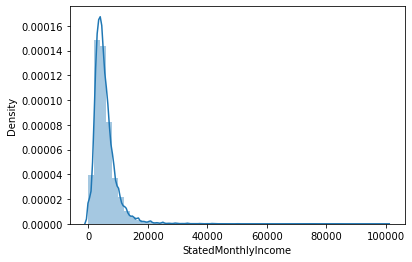

In [86]:
sb.distplot(df['StatedMonthlyIncome'])

In [131]:
np.log10(df.StatedMonthlyIncome.describe())

C:\Users\DS\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.056600
mean     3.744882
std      3.613439
min          -inf
25%      3.505150
50%      3.669007
75%      3.833528
max      5.000000
Name: StatedMonthlyIncome, dtype: float64

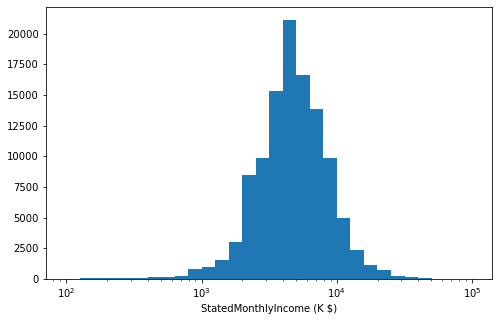

In [139]:
# update to a log-scaled plot
binsize = 0.1
bins = 10 ** np.arange(2, 5 + binsize, binsize)

# Generate appropriate ticks and labels
# ticks = np.arange(3, 4.54 + binsize, binsize)
# labels = ['{:0.1f}'.format(v / 1000) for v in bins]

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('StatedMonthlyIncome (K $)')
plt.xscale('log');
# plt.xticks(bins, labels);
plt.show();

C:\Users\DS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


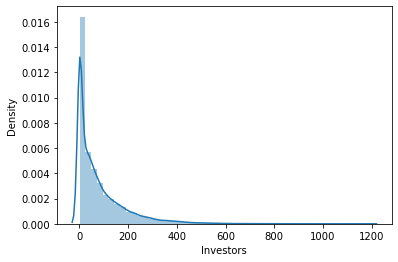

In [140]:
sb.distplot(df['Investors']);

In [144]:
df.Investors.describe()

count    113920.000000
mean         80.474623
std         103.239076
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

In [16]:
investors_outliers = df.Investors > 500
investors_outliers.sum()

812

In [167]:
investors_outliers.sum() / df.shape[0]

0.00234375

In [17]:
df = df.loc[~(df['Investors'] > 500)];

In [18]:
df.shape

(113108, 24)

In [155]:
np.log10(df.StatedMonthlyIncome.describe())

C:\Users\DS\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.056600
mean     3.744882
std      3.613439
min          -inf
25%      3.505150
50%      3.669007
75%      3.833528
max      5.000000
Name: StatedMonthlyIncome, dtype: float64

In [182]:
np.log2(df.StatedMonthlyIncome.describe())

count    16.787341
mean     12.432201
std      11.989017
min           -inf
25%      11.629556
50%      12.177835
75%      12.720672
max      16.609640
Name: StatedMonthlyIncome, dtype: float64

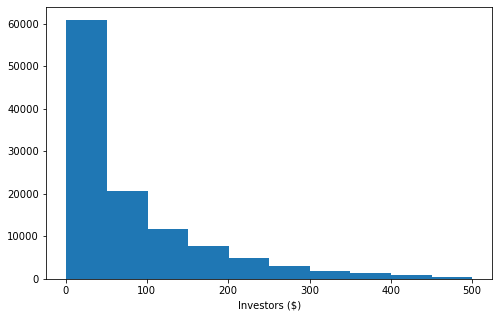

In [19]:
# update to a log-scaled plot
binsize = 5
bins = np.arange(1, 10 + binsize, binsize)

# Generate appropriate ticks and labels
# ticks = np.arange(3, 4.54 + binsize, binsize)
# labels = ['{:0.1f}'.format(v / 1000) for v in bins]

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Investors')
plt.xlabel('Investors ($)')
# plt.xscale('log');
# plt.xticks(bins, labels);
plt.show();

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [20]:
numeric_cols = ['LenderYield', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'Investors']
categoric_cols = ['LoanStatus', 'Term', 'ListingCategory', 'IncomeRange']

a choice was made to not make an ordering for categorical variables as none of them shows a clear order.

In [33]:
df.IncomeRange.value_counts()

$25,000-49,999    32129
$50,000-74,999    30890
$100,000+         16917
$75,000-99,999    16753
Not displayed      7726
$1-24,999          7272
Not employed        806
$0                  615
Name: IncomeRange, dtype: int64

In [24]:
df = df.reset_index()

In [25]:
# plot matrix: sample 1000 records so that plots are clearer and render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.loc[samples,:]

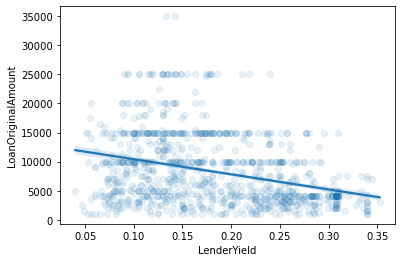

In [27]:
sb.regplot(data = df_samp, x="LenderYield", y = 'LoanOriginalAmount', scatter_kws={'alpha':1/10});

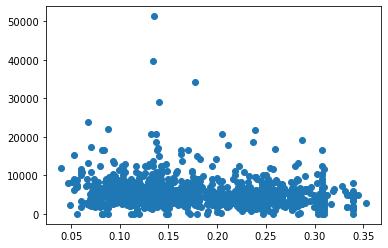

In [29]:
plt.scatter(data = df_samp, x="LenderYield", y = 'StatedMonthlyIncome');

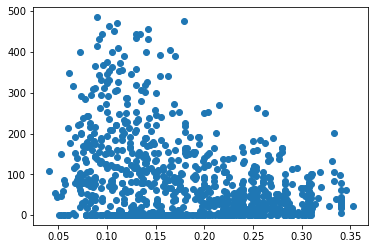

In [31]:
plt.scatter(data = df_samp, x="LenderYield", y = 'Investors');

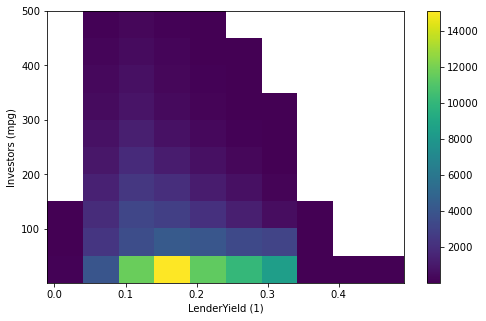

In [224]:
# plt.subplot(1, 2, 2)
plt.figure(figsize = [8, 5]);
plt.hist2d(data = df, x="LenderYield", y = 'Investors', cmin=0.5)
plt.colorbar()
plt.xlabel('LenderYield (1)')
plt.ylabel('Investors (mpg)');

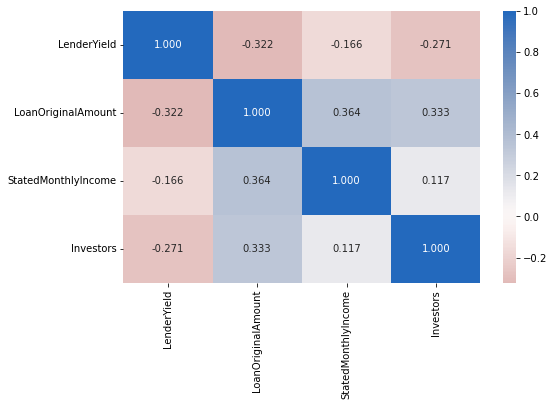

In [191]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

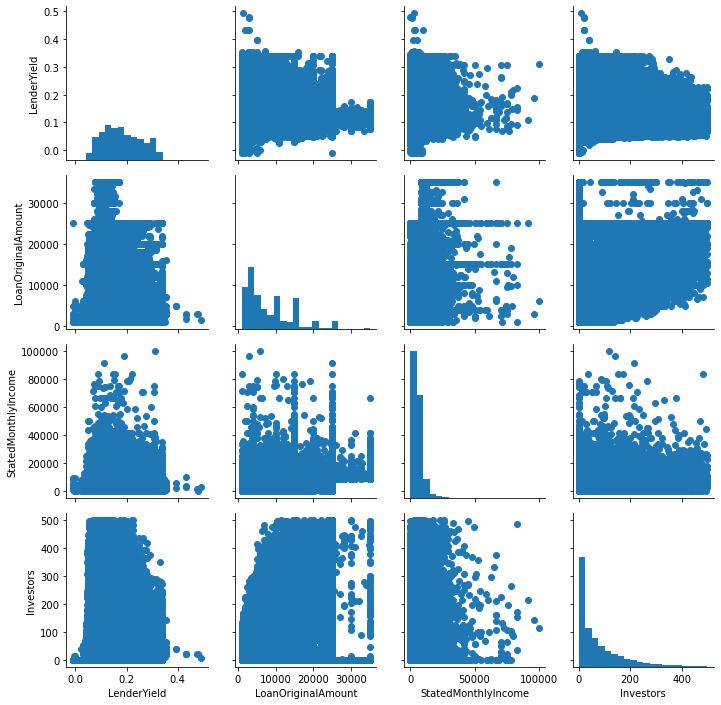

In [35]:
g = sb.PairGrid(data = df, vars = numeric_cols)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

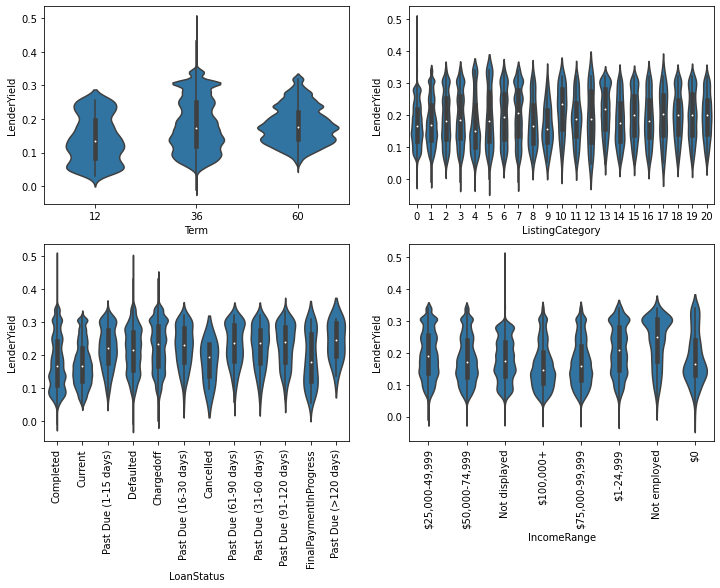

In [46]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = [12,8])

sb.violinplot(data=df, x='Term', y='LenderYield', color=base_color, ax = ax[0, 0]);
sb.violinplot(data=df, x='ListingCategory', y='LenderYield', color=base_color, ax = ax[0, 1]);
sb.violinplot(data=df, x='LoanStatus', y='LenderYield', color=base_color, ax = ax[1, 0]);
ax[1, 0].tick_params(axis='x', rotation=90);
sb.violinplot(data=df, x='IncomeRange', y='LenderYield', color=base_color, ax = ax[1, 1]);
plt.xticks(rotation=90);

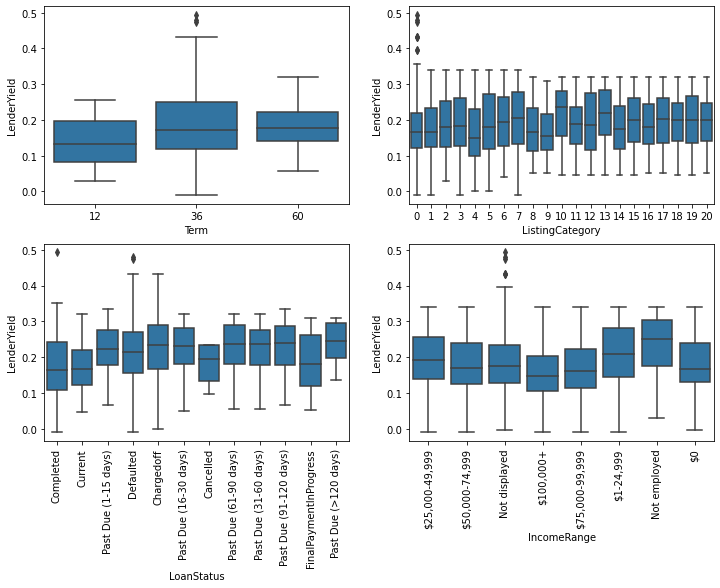

In [47]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize = [12,8])

sb.boxplot(data=df, x='Term', y='LenderYield', color=base_color, ax = ax[0, 0]);
sb.boxplot(data=df, x='ListingCategory', y='LenderYield', color=base_color, ax = ax[0, 1]);
sb.boxplot(data=df, x='LoanStatus', y='LenderYield', color=base_color, ax = ax[1, 0]);
ax[1, 0].tick_params(axis='x', rotation=90);
sb.boxplot(data=df, x='IncomeRange', y='LenderYield', color=base_color, ax = ax[1, 1]);
plt.xticks(rotation=90);

In [ ]:
sb.boxplot(data=df, x='StatedMonthlyIncome', y='LenderYield', color=base_color);
plt.xticks(rotation=90);

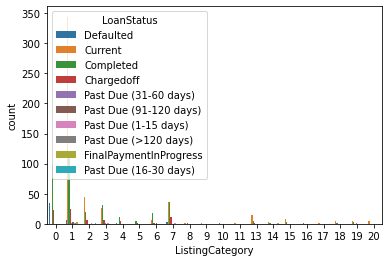

In [79]:
sb.countplot(data=df_samp, x="ListingCategory", hue="LoanStatus");

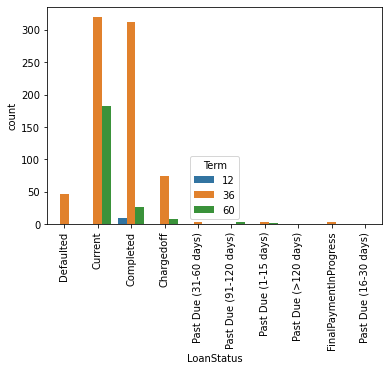

In [54]:
sb.countplot(data=df_samp, x="LoanStatus", hue="Term");
plt.xticks(rotation=90);

In [ ]:
sb.countplot(data=df_samp, x="LoanStatus", hue="Term");
plt.xticks(rotation=90);

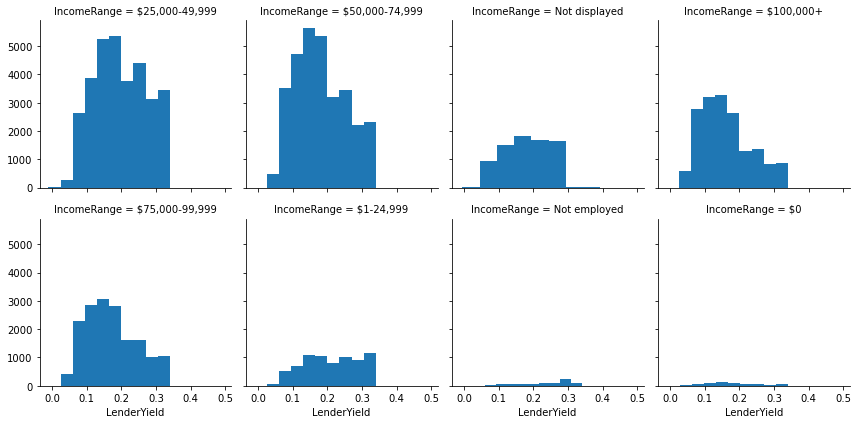

In [60]:
g = sb.FacetGrid(data=df, col="IncomeRange", col_wrap=4);
g.map(plt.hist, 'LenderYield');

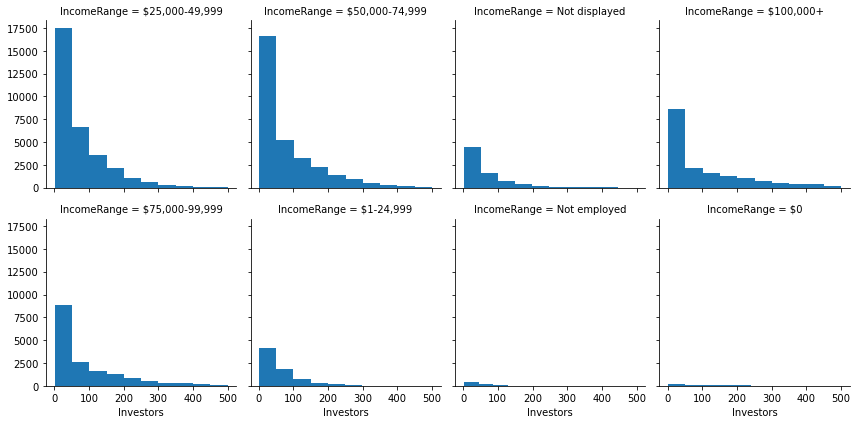

In [61]:
g = sb.FacetGrid(data=df, col="IncomeRange", col_wrap=4);
g.map(plt.hist, 'Investors');

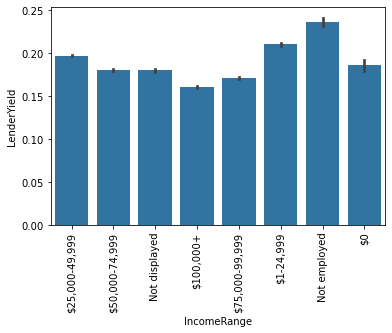

In [64]:
sb.barplot(data=df, x='IncomeRange', y='LenderYield', color=base_color);
plt.xticks(rotation=90);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

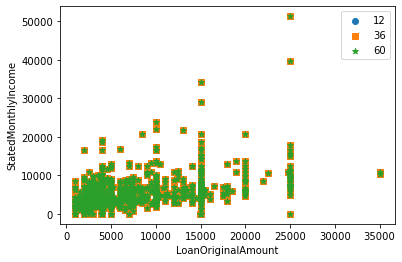

In [68]:
cat_markers = [[12, 'o'],
               [36, 's'],
              [60, '*']]

for cat, marker in cat_markers:
    df_cat = df[df['Term'] == cat]
    plt.scatter(data = df_samp, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', marker = marker)
plt.legend([12, 36, 60])
plt.xlabel('LoanOriginalAmount');
plt.ylabel('StatedMonthlyIncome');

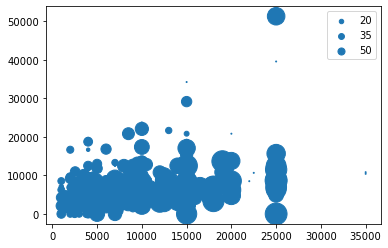

In [72]:
plt.scatter(data = df_samp, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', s = 'Investors');
sizes = [20, 35, 50]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes);

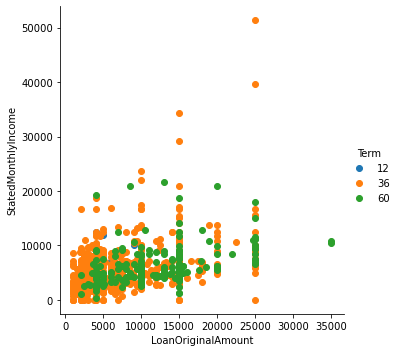

In [76]:
g = sb.FacetGrid(data = df_samp, hue = 'Term', height = 5);
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');
g.add_legend();

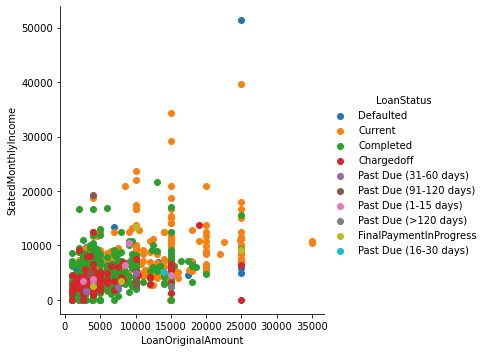

In [77]:
# 2 numeric, 1 categorical
g = sb.FacetGrid(data = df_samp, hue = 'LoanStatus', height = 5);
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');
g.add_legend();

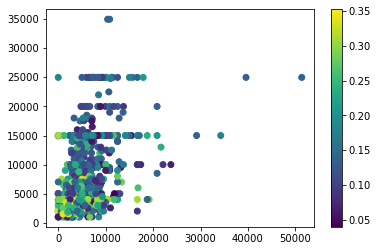

In [84]:
# 3 numeric
plt.scatter(data = df_samp, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', c = 'LenderYield');
plt.colorbar();

In [85]:
## add LoanAmount and interest rate comparison

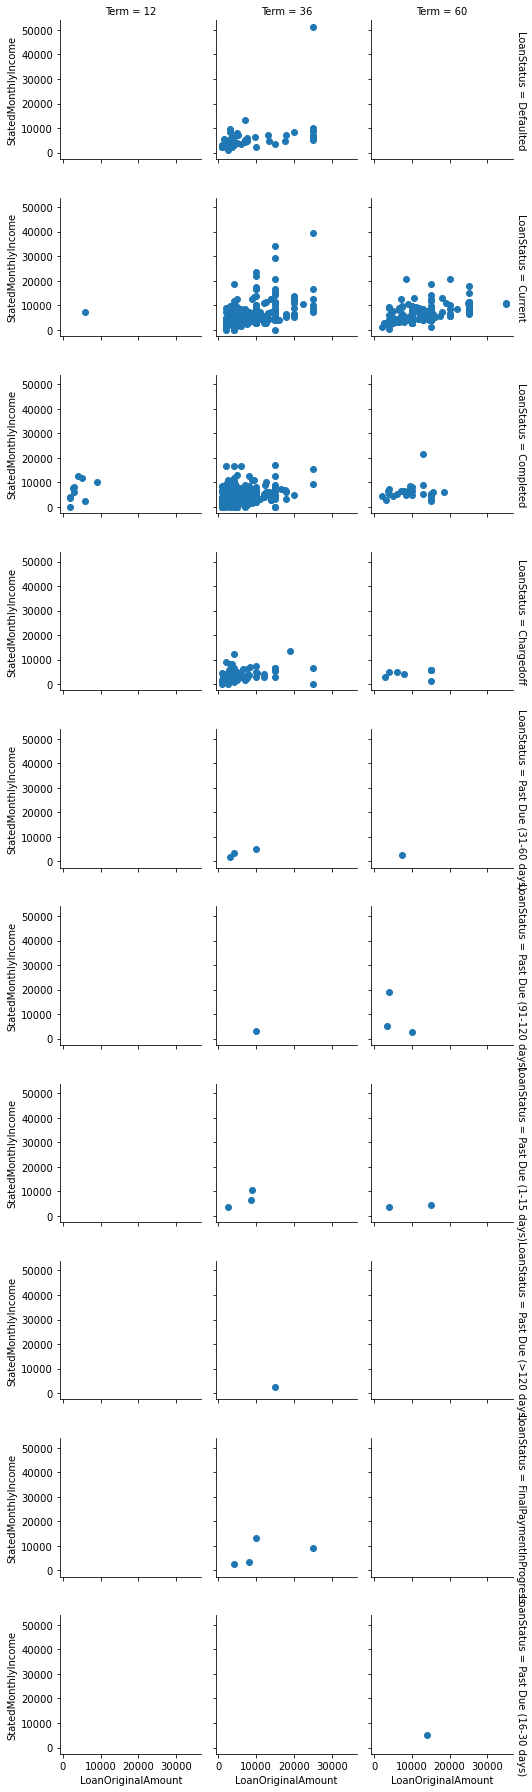

In [88]:
g = sb.FacetGrid(data = df_samp, col = 'Term', row = 'LoanStatus', height = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome');

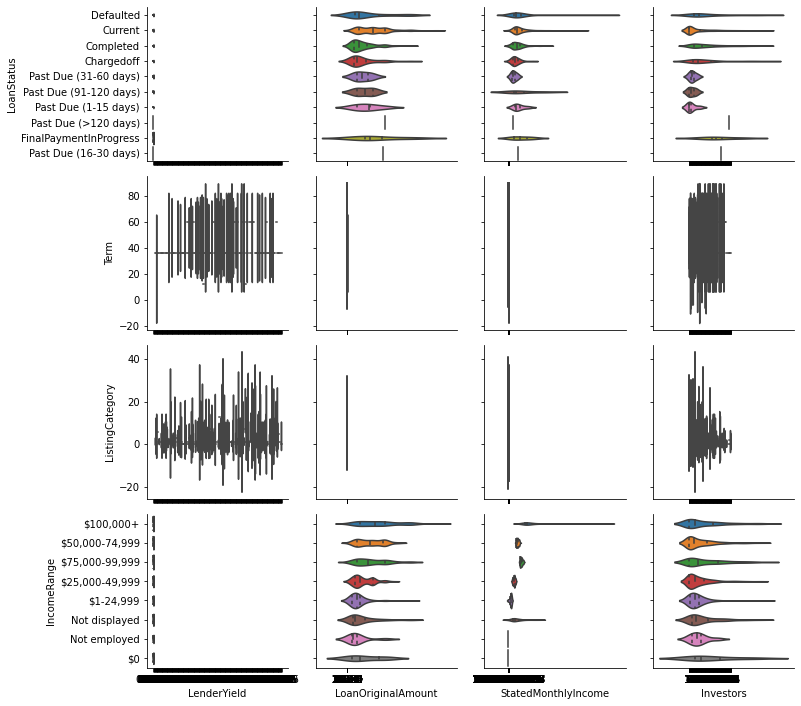

In [89]:
g = sb.PairGrid(data = df_samp, x_vars = numeric_cols,
                y_vars = categoric_cols)
g.map(sb.violinplot, inner = 'quartile')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!